In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes_selected.csv')

** Standard Scaler ** 

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('Outcome',axis=1))
scaled_features = scaler.transform(data.drop('Outcome',axis=1))

** Cross validation **

In [4]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

** SVC Classifier **

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [7]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [8]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7150837988826816, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7206703910614525, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.776536312849162, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6536312849162011, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.7150837988826816, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6871508379888268, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6145251396648045, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ...............

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [9]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [10]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
grid_predictions = grid.predict(X_test)

In [12]:
#svc_model = SVC()
#svc_model.fit(X_train,y_train)
#predictions = svc_model.predict(X_test)

In [13]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[136  13]
 [ 36  46]]
             precision    recall  f1-score   support

          0       0.79      0.91      0.85       149
          1       0.78      0.56      0.65        82

avg / total       0.79      0.79      0.78       231



** KNN Classifier ** 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Best number of n: 7


Text(0,0.5,'Error Rate')

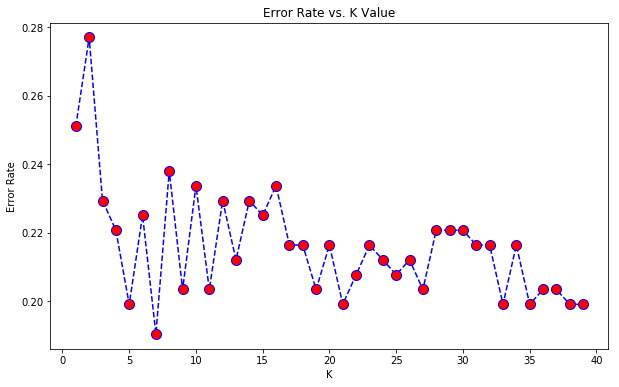

In [15]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print("Best number of n: " + str(error_rate.index(min(error_rate))+1))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [17]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[136  13]
 [ 31  51]]
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       149
          1       0.80      0.62      0.70        82

avg / total       0.81      0.81      0.80       231



** Decision Tree Classifier **

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [19]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[126  23]
 [ 31  51]]
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       149
          1       0.69      0.62      0.65        82

avg / total       0.76      0.77      0.76       231



In [20]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.drop('Outcome',axis=1))
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [21]:
#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())  

** Random Forest Classifier **

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[137  12]
 [ 28  54]]
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       149
          1       0.82      0.66      0.73        82

avg / total       0.83      0.83      0.82       231



** Logistic Regression  **

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [25]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[137  12]
 [ 34  48]]
             precision    recall  f1-score   support

          0       0.80      0.92      0.86       149
          1       0.80      0.59      0.68        82

avg / total       0.80      0.80      0.79       231



** Gaussian Naive Bayes  **

In [26]:
from sklearn.naive_bayes import GaussianNB
gnbmodel = GaussianNB()
gnbmodel.fit(X_train,y_train)
predictions = gnbmodel.predict(X_test)

In [27]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[133  16]
 [ 30  52]]
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       149
          1       0.76      0.63      0.69        82

avg / total       0.80      0.80      0.80       231

